# Bike Sharing Dataset Data Set

### MAR-25-2498

## Tejas MS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the dataset
data_path = "day.csv"
df = pd.read_csv(data_path)


In [5]:
# Display first few rows
display(df.head())


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Data Cleaning and Typecasting
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [9]:
# Checking for missing values
print(df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
# Converting categorical variables
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_features:
    df[col] = df[col].astype('category')



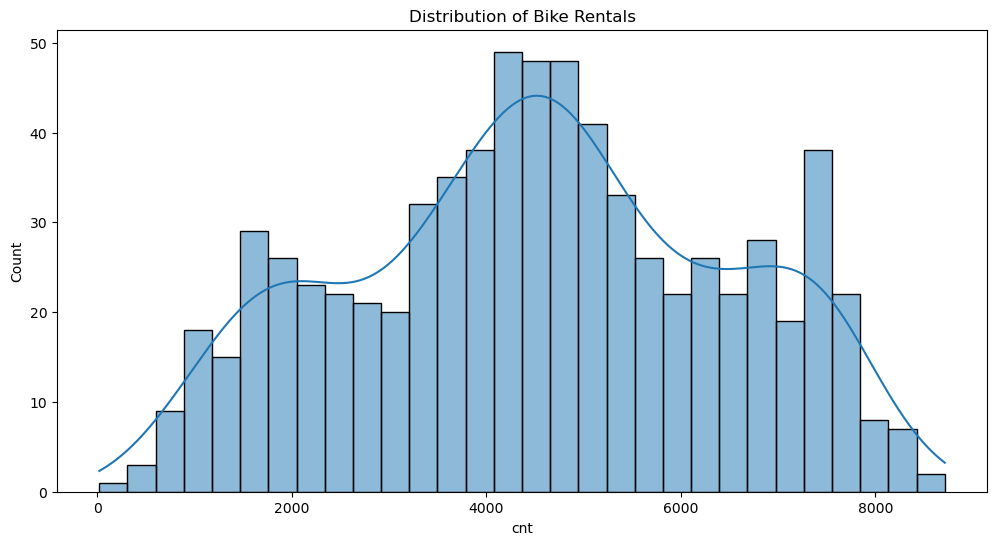

In [13]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

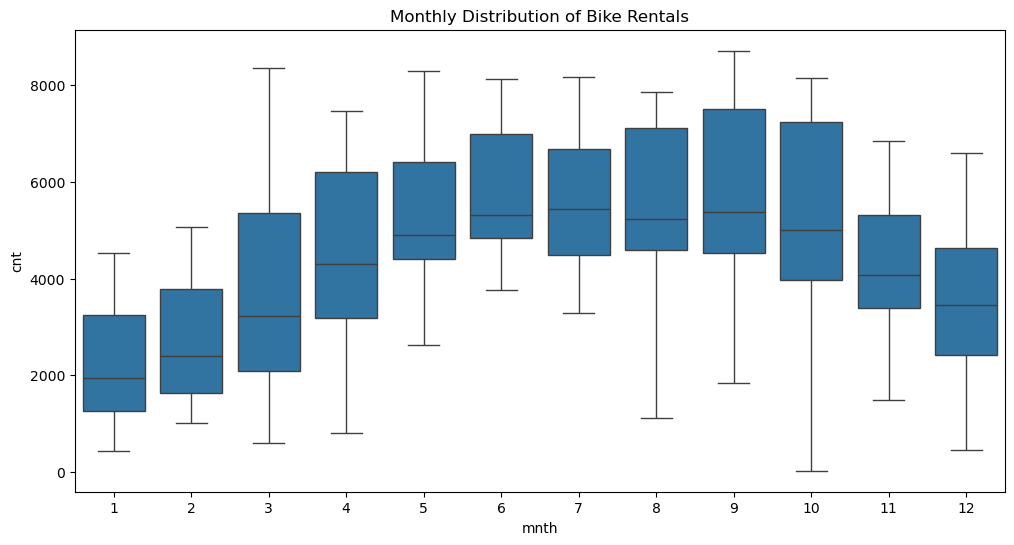

In [14]:
# Monthly Trend
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title("Monthly Distribution of Bike Rentals")
plt.show()

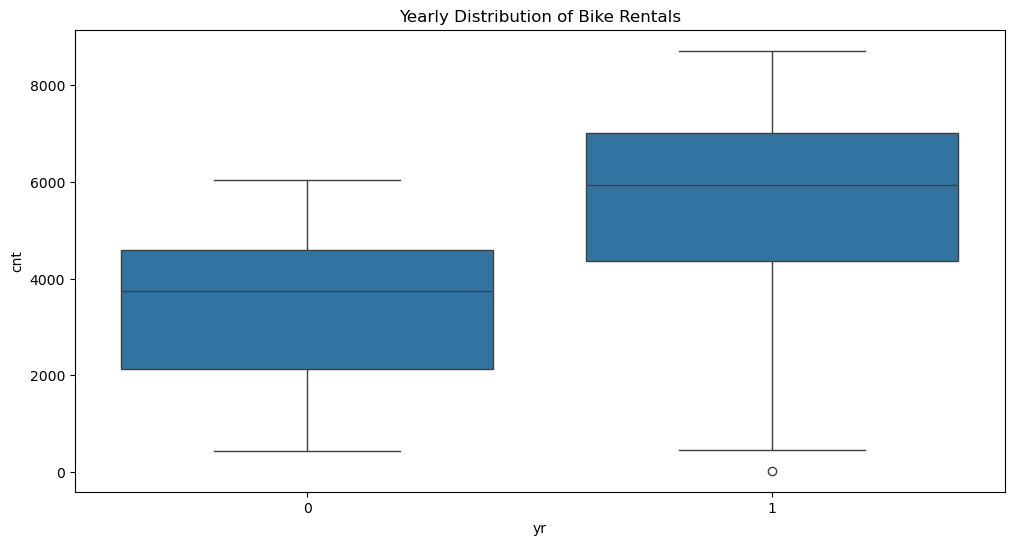

In [21]:
# Yearly Trend
plt.figure(figsize=(12, 6))
sns.boxplot(x='yr', y='cnt', data=df)
plt.title("Yearly Distribution of Bike Rentals")
plt.show()


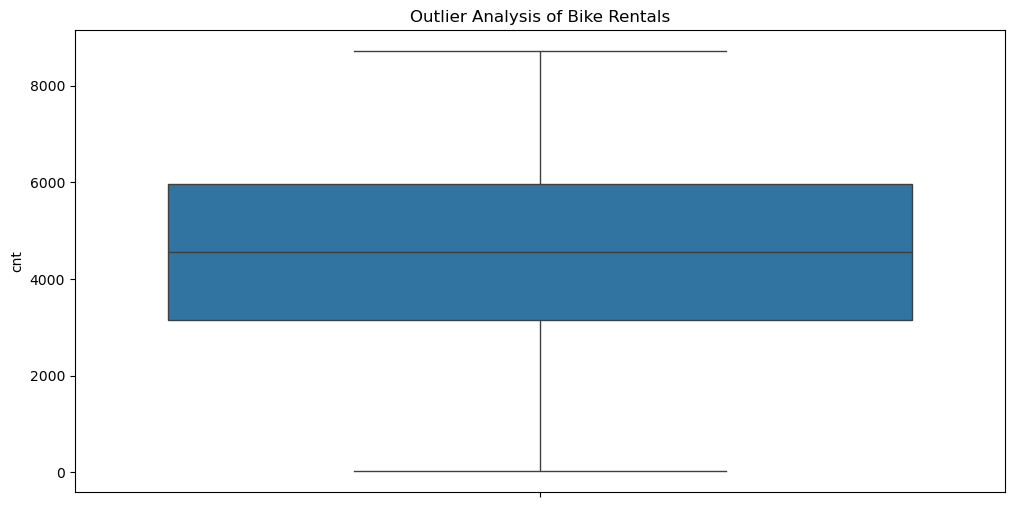

In [22]:
# Outlier Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['cnt'])
plt.title("Outlier Analysis of Bike Rentals")
plt.show()

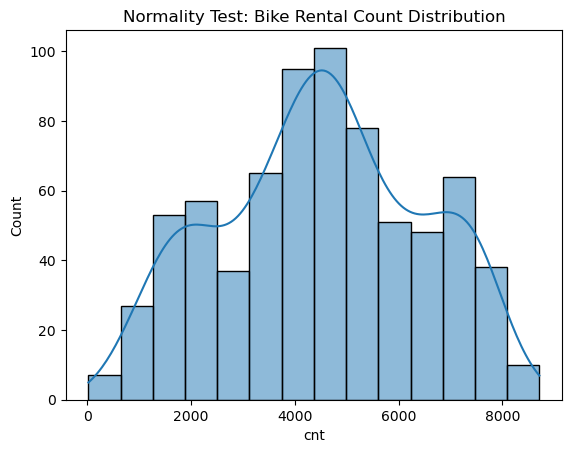

In [23]:
# Normality Test
sns.histplot(df['cnt'], kde=True)
plt.title("Normality Test: Bike Rental Count Distribution")
plt.show()

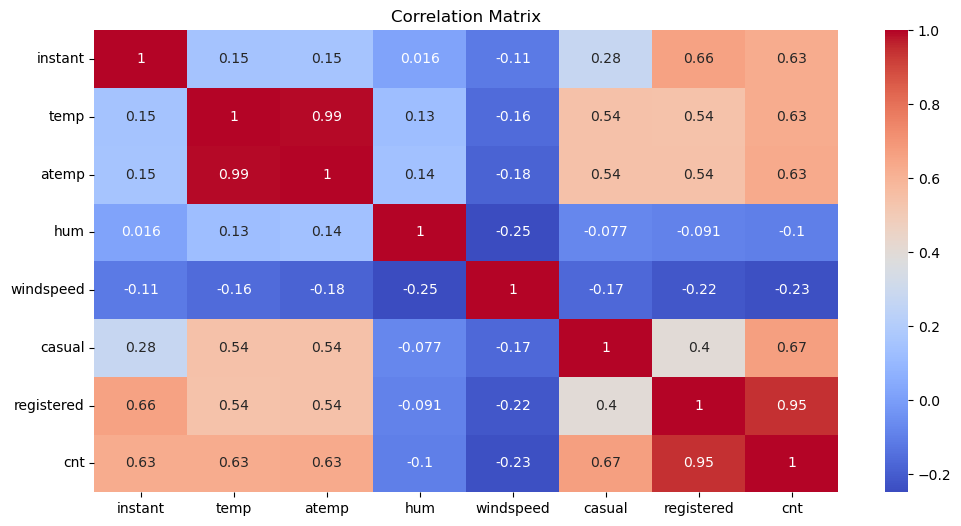

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [28]:
# Preparing Data for Modeling
X = df.drop(columns=['instant', 'dteday', 'cnt', 'casual', 'registered'])
y = df['cnt']

In [31]:
# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)


In [33]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Modeling
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [37]:
# Training and Cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation R^2 Score: {r2_score(y_train, y_pred_cv):.4f}")


Linear Regression Cross-Validation R^2 Score: 0.8191
Decision Tree Cross-Validation R^2 Score: 0.7116
Random Forest Cross-Validation R^2 Score: 0.8484


In [38]:
# Model Predictions on Test Data
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Test R^2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")
    print(f"{name} MAE: {mean_absolute_error(y_test, y_pred):.4f}\n")

Linear Regression Test R^2 Score: 0.8418
Linear Regression RMSE: 796.4618
Linear Regression MAE: 583.0198

Decision Tree Test R^2 Score: 0.7482
Decision Tree RMSE: 1004.7531
Decision Tree MAE: 658.1156

Random Forest Test R^2 Score: 0.8700
Random Forest RMSE: 721.9955
Random Forest MAE: 468.1222



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
# Choosing the best model based on R^2 score
best_model = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
print(f"Best Model for Bike Rental Prediction: {best_model}")


Best Model for Bike Rental Prediction: Random Forest


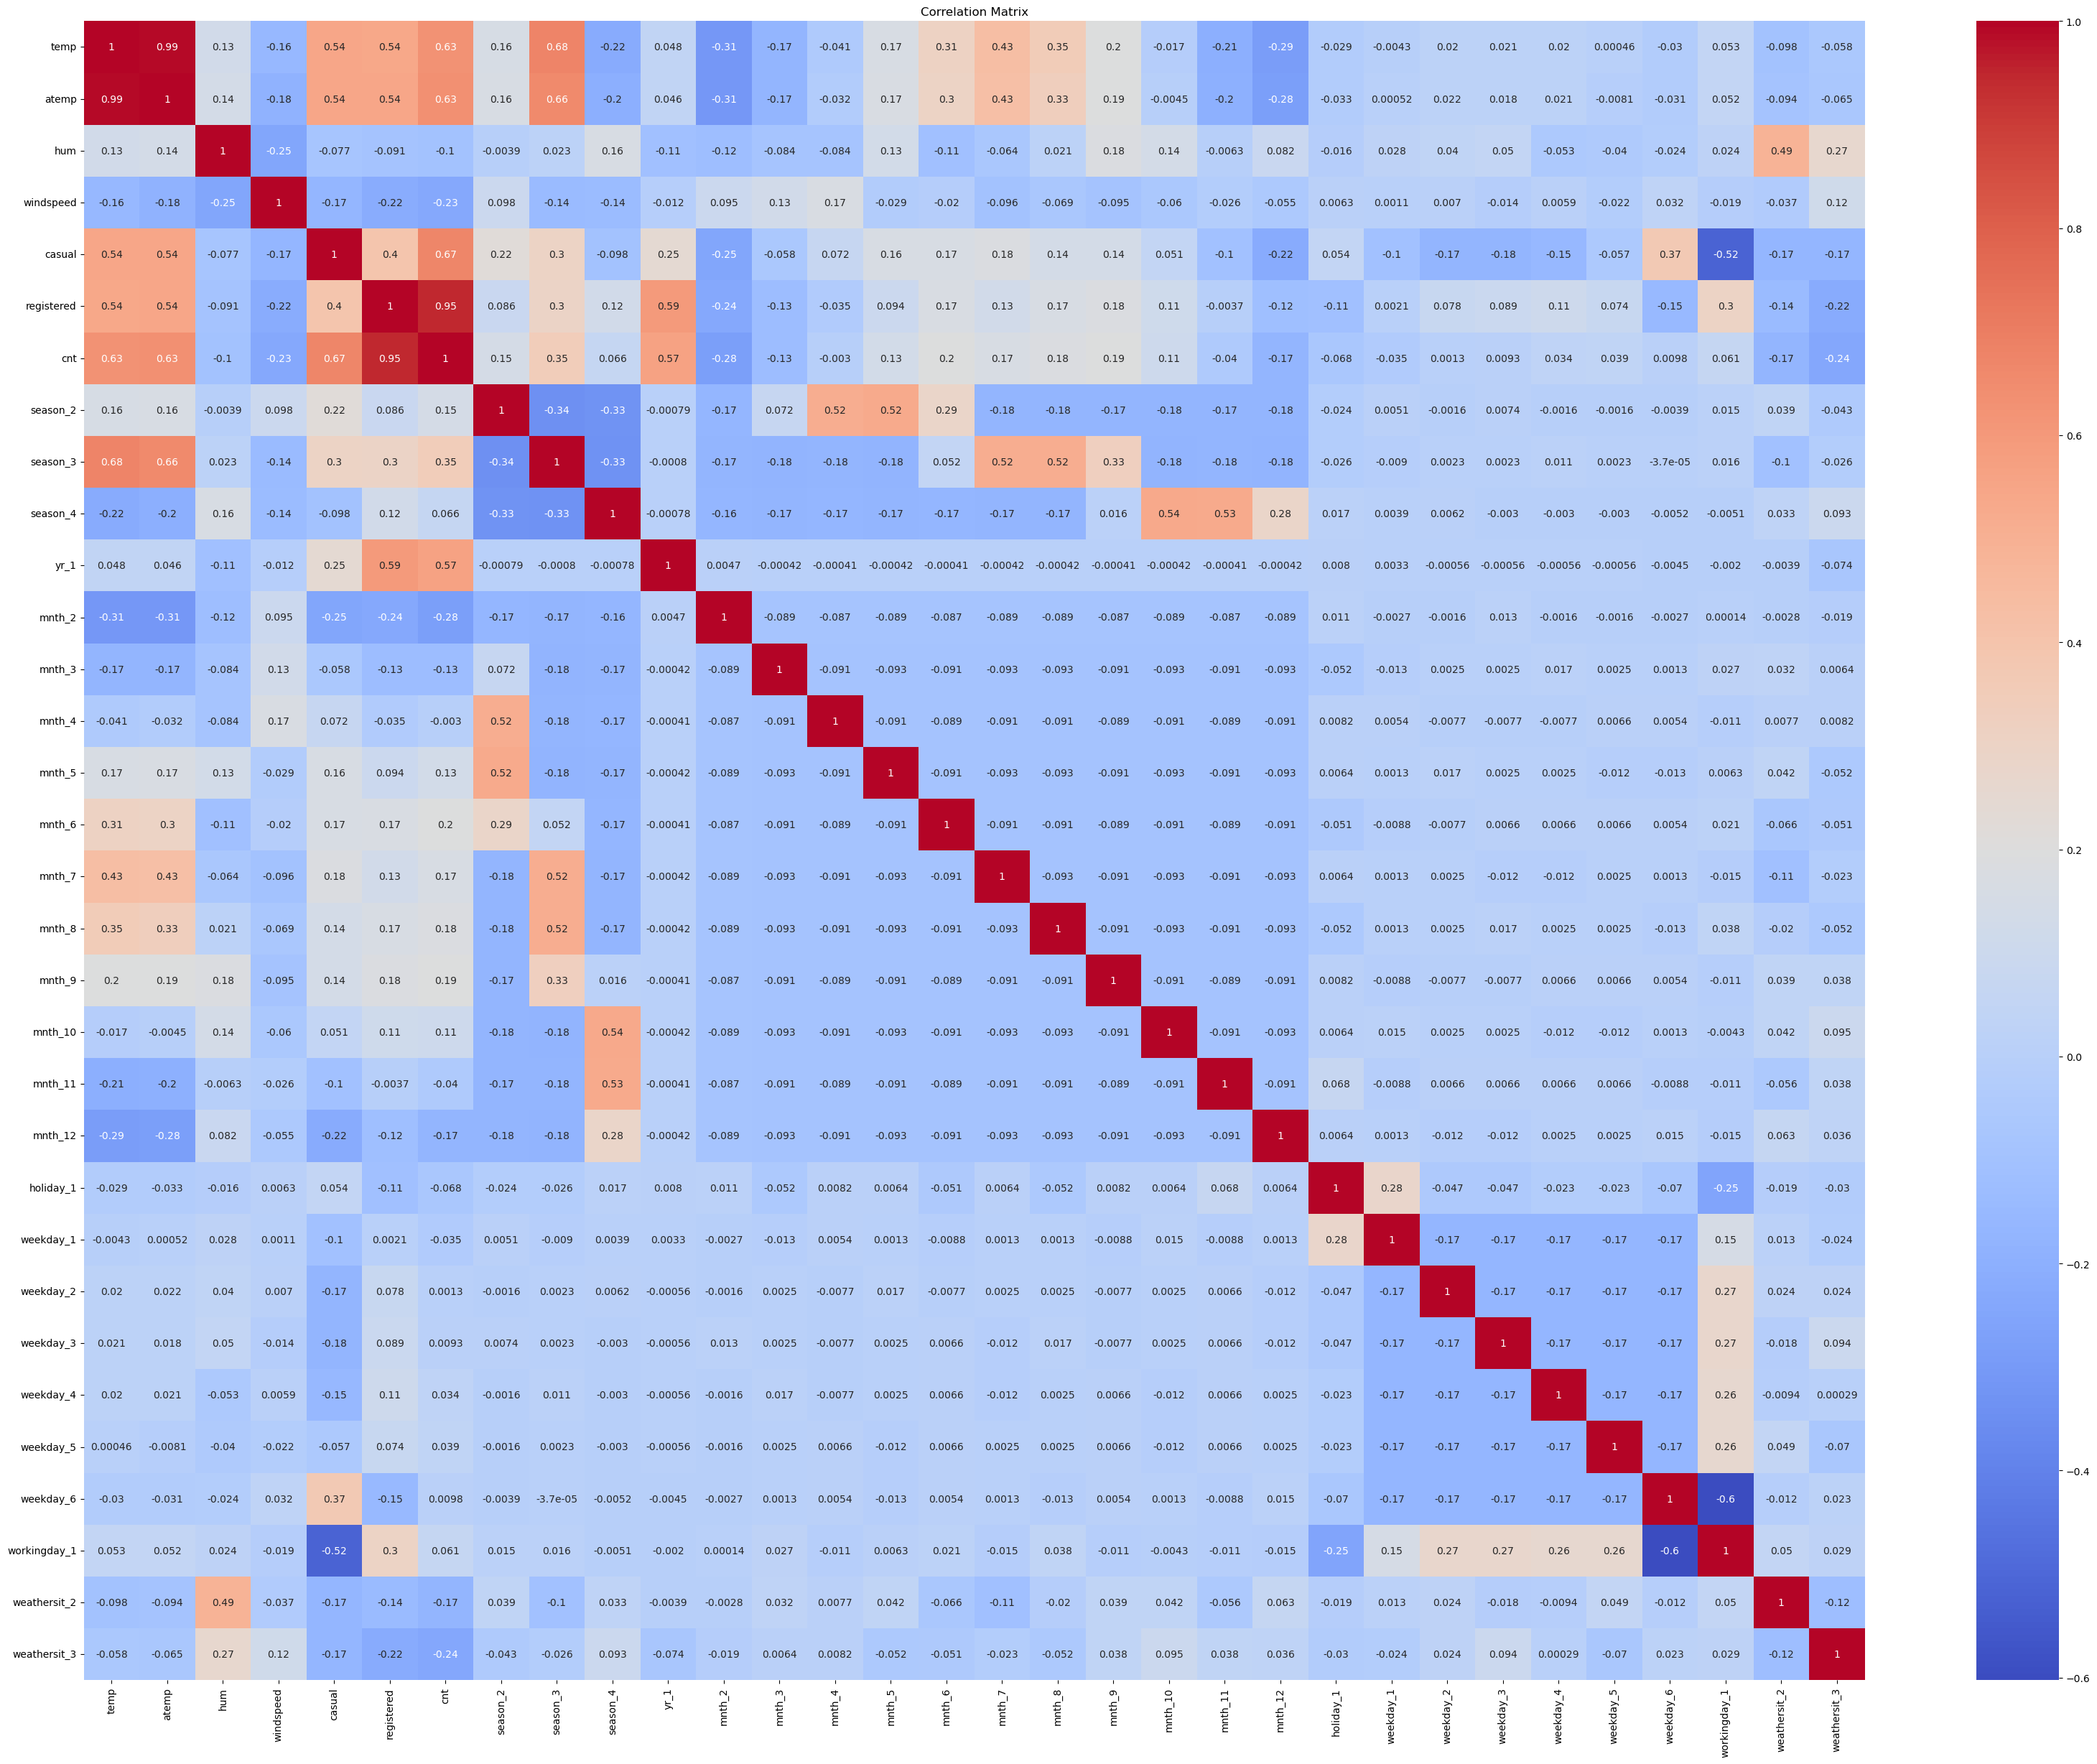

In [51]:
# Convert categorical features to numeric
df_numeric = df.copy()
df_numeric = df_numeric.drop(columns=['dteday', 'instant'])  # Drop non-numeric columns
df_numeric = pd.get_dummies(df_numeric, drop_first=True)  # Convert categorical to numeric

# Correlation Matrix
plt.figure(figsize=(40, 30))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [57]:
# Load the hour dataset
hour_data_path = ("hour1.csv")
df_hour = pd.read_csv(hour_data_path)

In [59]:
# Display first few rows
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
# Check for missing values
print(df_hour.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


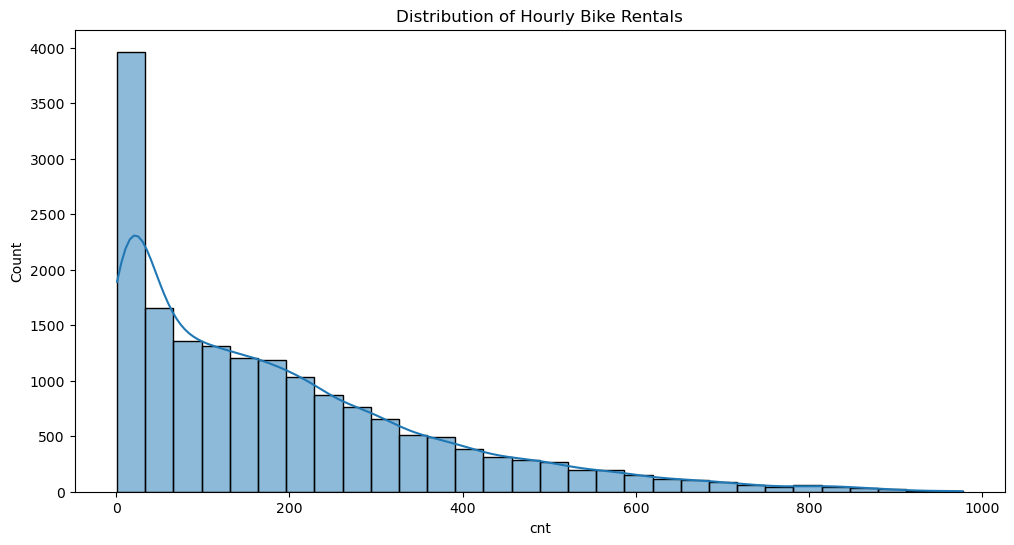

In [63]:
# Exploratory Analysis on Hourly Data
plt.figure(figsize=(12, 6))
sns.histplot(df_hour['cnt'], bins=30, kde=True)
plt.title("Distribution of Hourly Bike Rentals")
plt.show()

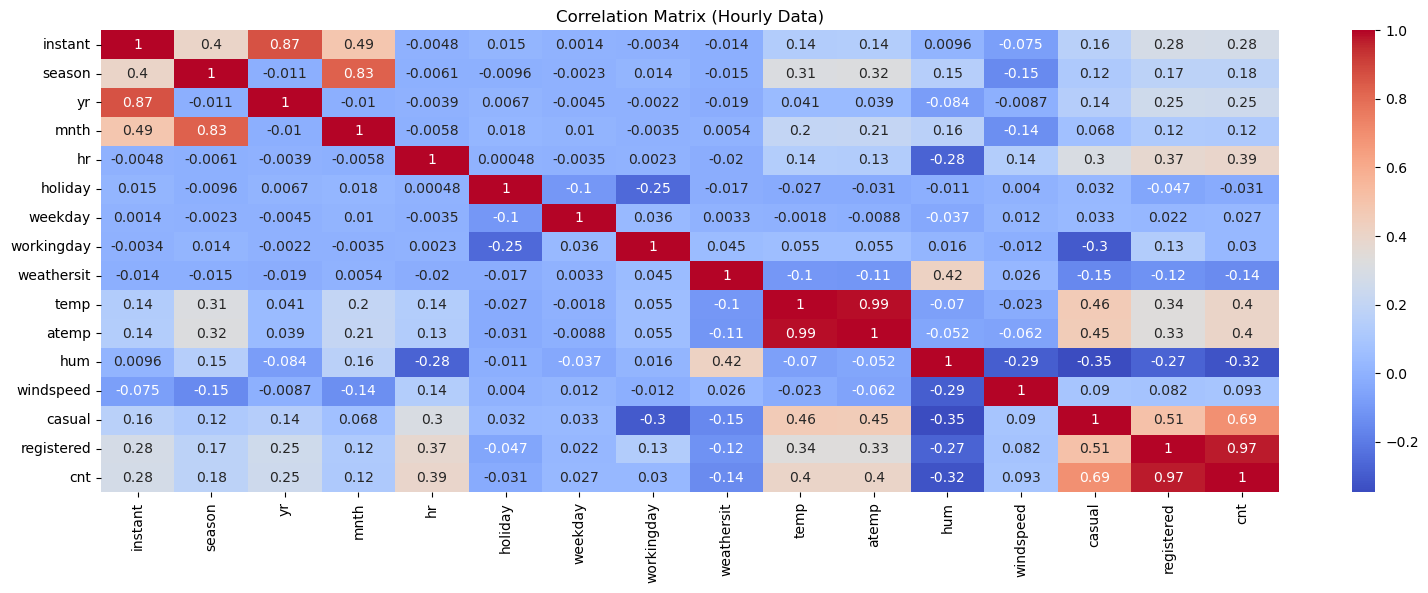

In [65]:
plt.figure(figsize=(19, 6))
sns.heatmap(df_hour.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Hourly Data)")
plt.show()


In [67]:
# Convert categorical features to numeric
df_numeric = df.copy()
df_numeric = df_numeric.drop(columns=['dteday', 'instant'])  # Drop non-numeric columns
df_numeric = pd.get_dummies(df_numeric, drop_first=True)  # Convert categorical to numeric


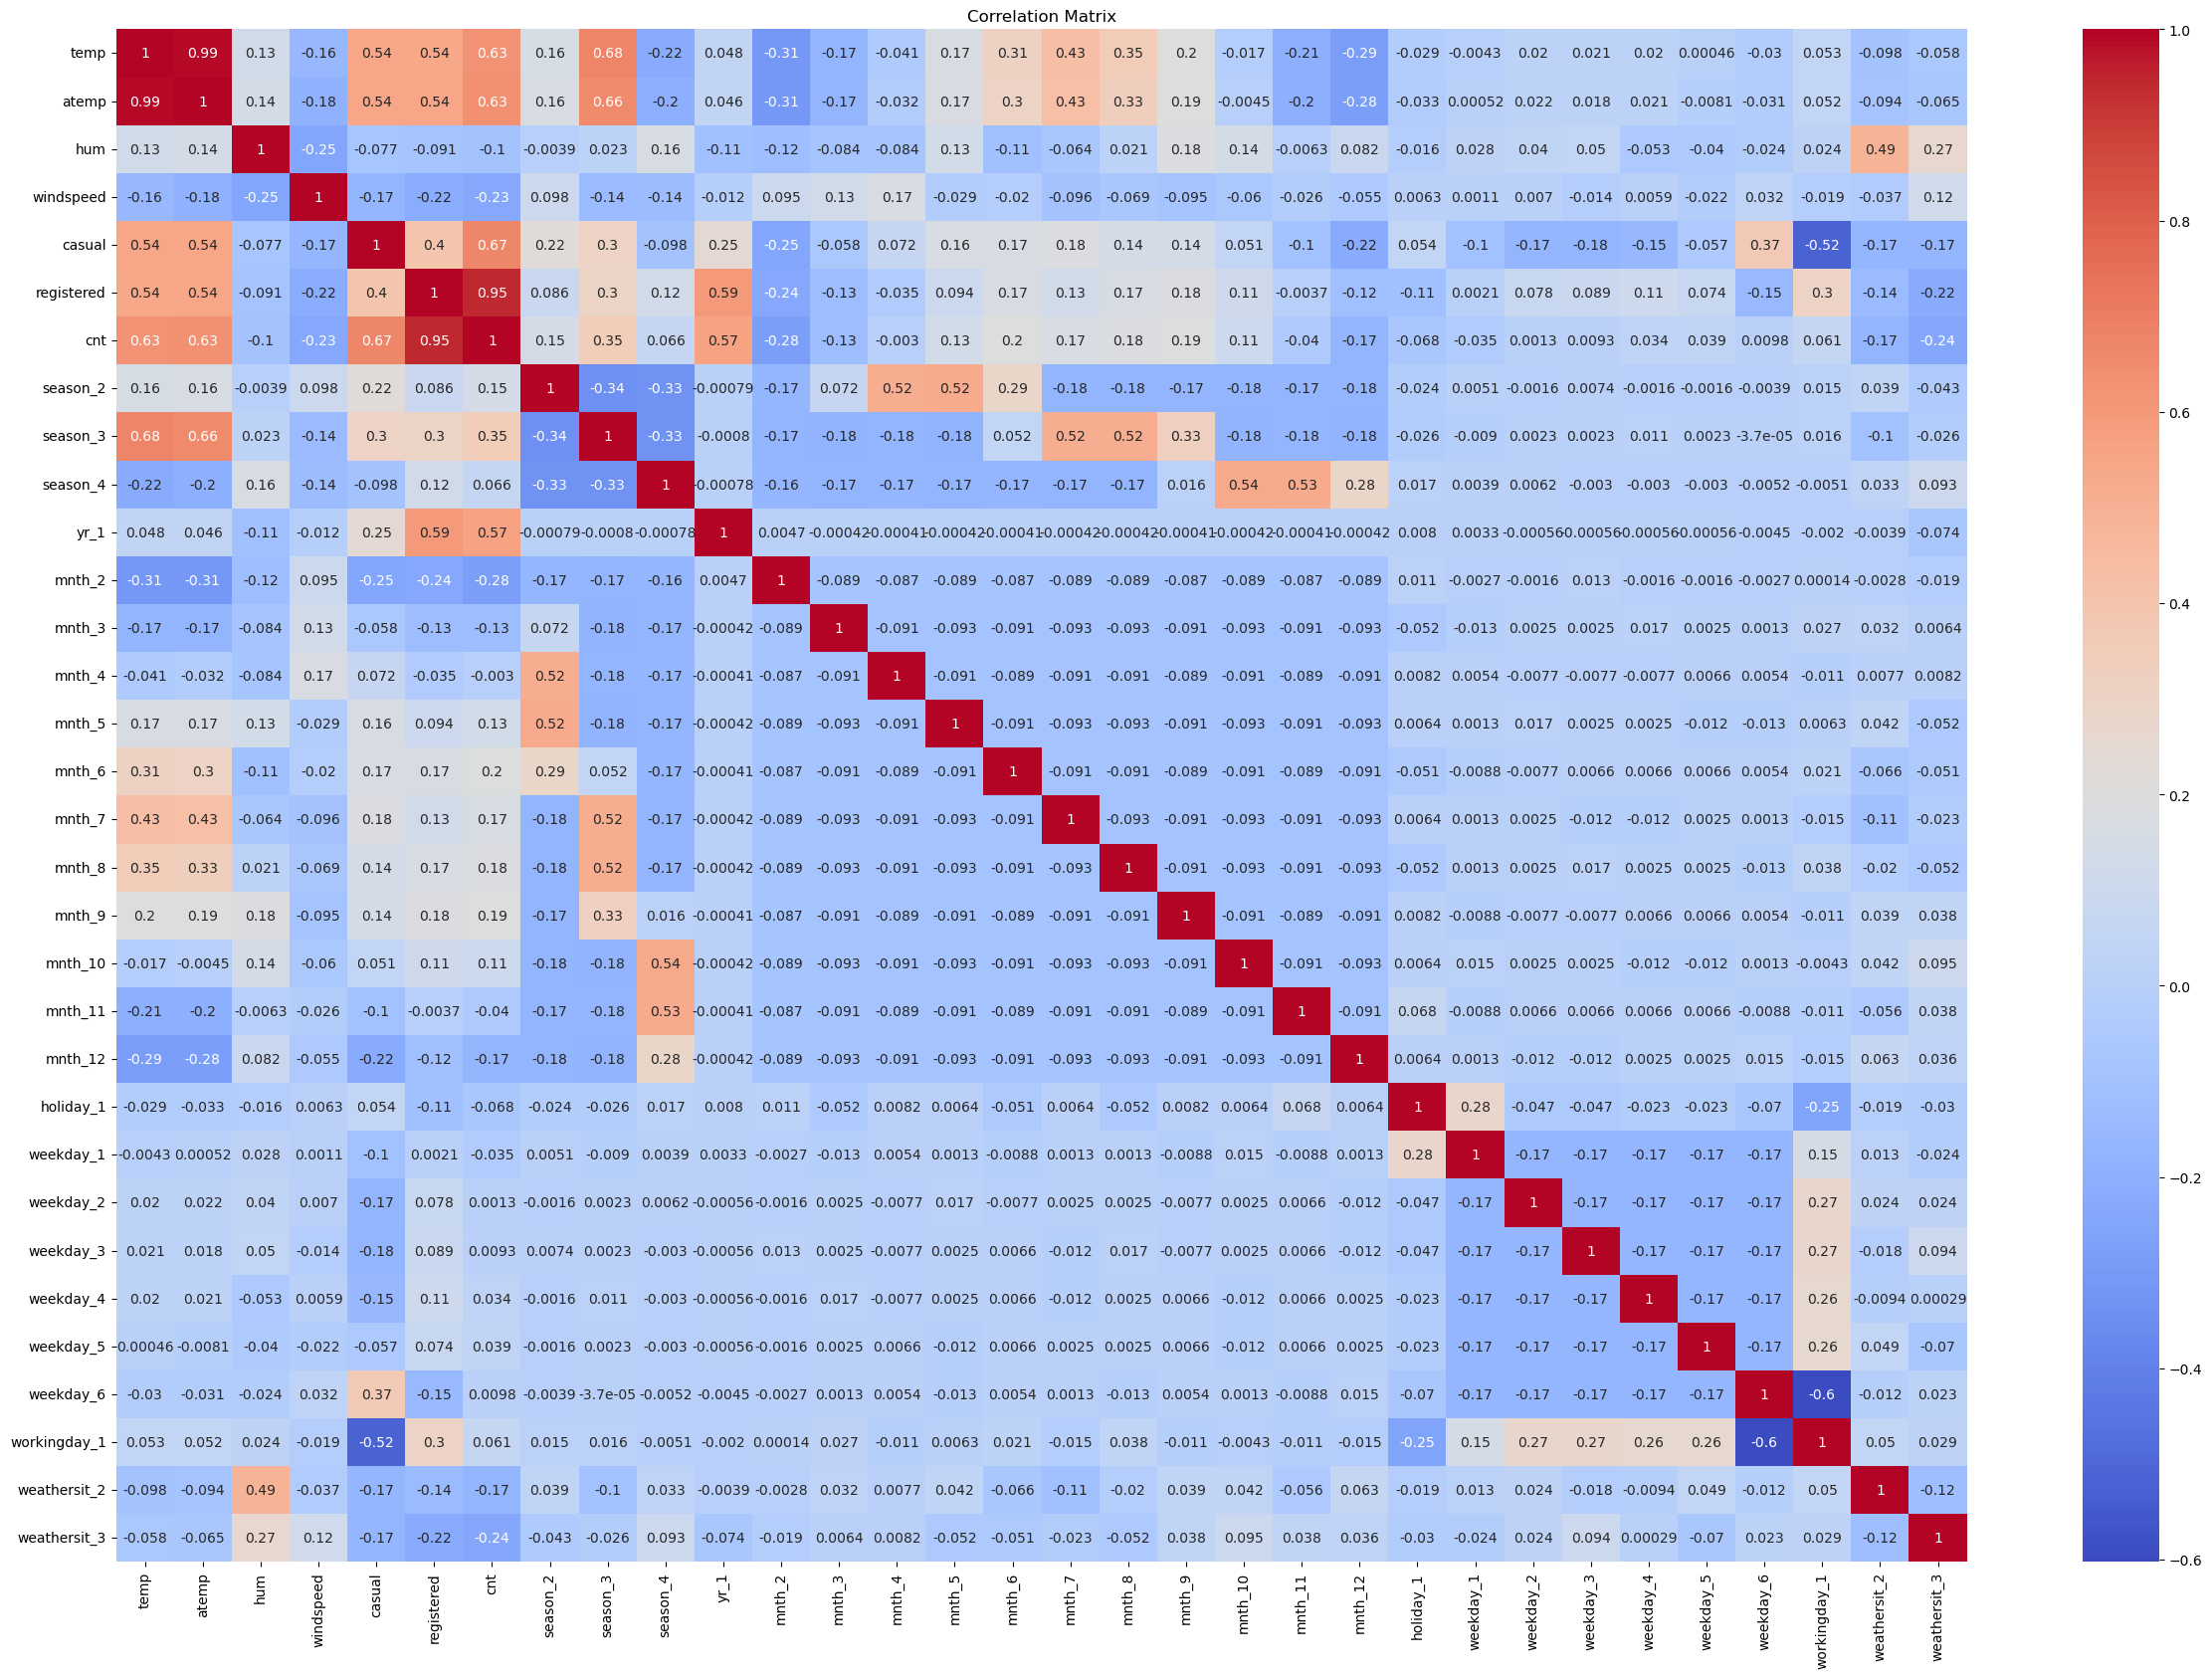

In [99]:
# Correlation Matrix
plt.figure(figsize=(30, 20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 1. Summary of the Notebook
* Imports & Setup
* The notebook imports key libraries like pandas, numpy, matplotlib, seaborn, and sklearn.
* Models included:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Evaluation Metrics:
* r2_score, mean_squared_error, mean_absolute_error
* Dataset: day.csv is loaded.
* Data Preprocessing
* Dataset Inspection: df.head() is displayed.
* Checking Data Types: df.info() is used to check column types.
* Checking for Missing Values: df.isnull().sum() is used to find missing data.
* Model Training & Evaluation
* Data Splitting: train_test_split() is used to split data into training and testing sets.
* Multiple Models: Three regression models are trained and evaluated.
* Cross-Validation: cross_val_score() and cross_val_predict() are used to validate models.
* Performance Metrics: r2_score, MSE, and MAE are calculated.


# 2. Problems Faced
* (1) Missing Feature Engineering
The dataset likely contains categorical features like season, weather, and holiday, but it’s unclear if they were encoded properly.
Possible Fix: Use LabelEncoder or OneHotEncoder for categorical variables before training.
* (2) No Hyperparameter Tuning
The models seem to be trained with default parameters, which might not be optimal.
Possible Fix: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
* (3) No Feature Scaling
If features have different scales, some models (like Linear Regression) might perform poorly.
Possible Fix: Normalize numerical features using StandardScaler or MinMaxScaler.
* (4) Model Comparison
There is no clear comparison of model performance.
Possible Fix: Plot a bar chart of r2_score, MSE, and MAE for better visualization.
* (5) Data Leakage Check
If cnt (total rentals) is highly correlated with another variable (e.g., registered or casual users), it could lead to data leakage.
Possible Fix: Check correlation (df.corr()) and drop highly dependent features.

3. Conclusion
 * The notebook is structured well for bike rental prediction using regression models.
 * The dataset is cleaned, models are trained, and evaluation metrics are computed.
  * Feature engineering (encoding categorical data) and scaling numerical features should be improved.
* Hyperparameter tuning is missing, which could enhance model performance.
* Model comparison should be visualized for better insights.